In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

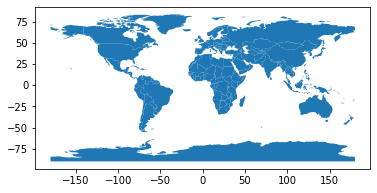

In [5]:
world.plot()

In [15]:
world['name'].tolist()

['Fiji',
 'Tanzania',
 'W. Sahara',
 'Canada',
 'United States of America',
 'Kazakhstan',
 'Uzbekistan',
 'Papua New Guinea',
 'Indonesia',
 'Argentina',
 'Chile',
 'Dem. Rep. Congo',
 'Somalia',
 'Kenya',
 'Sudan',
 'Chad',
 'Haiti',
 'Dominican Rep.',
 'Russia',
 'Bahamas',
 'Falkland Is.',
 'Norway',
 'Greenland',
 'Fr. S. Antarctic Lands',
 'Timor-Leste',
 'South Africa',
 'Lesotho',
 'Mexico',
 'Uruguay',
 'Brazil',
 'Bolivia',
 'Peru',
 'Colombia',
 'Panama',
 'Costa Rica',
 'Nicaragua',
 'Honduras',
 'El Salvador',
 'Guatemala',
 'Belize',
 'Venezuela',
 'Guyana',
 'Suriname',
 'France',
 'Ecuador',
 'Puerto Rico',
 'Jamaica',
 'Cuba',
 'Zimbabwe',
 'Botswana',
 'Namibia',
 'Senegal',
 'Mali',
 'Mauritania',
 'Benin',
 'Niger',
 'Nigeria',
 'Cameroon',
 'Togo',
 'Ghana',
 "Côte d'Ivoire",
 'Guinea',
 'Guinea-Bissau',
 'Liberia',
 'Sierra Leone',
 'Burkina Faso',
 'Central African Rep.',
 'Congo',
 'Gabon',
 'Eq. Guinea',
 'Zambia',
 'Malawi',
 'Mozambique',
 'eSwatini',
 'Angol

In [ ]:
# Returns names of available maps
geopandas.datasets.available
# Returns path of a particular map
geopandas.datasets.get_path('naturalearth_lowres')
# Opens the map as a GeoDataFrame
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Subsets the GeoDataFrame
usa = world[world.name == "United States of America"]
# Plots
world.plot();

In [16]:
path =r'C:\Users\jadep\Documents\Career Foundry\Achievement 6\Human Trafficking'

In [100]:
df=pd.read_csv(os.path.join(path,'Data','HTworld geo.csv'),index_col=False)

In [85]:
df['citizenship'].value_counts()

United States of America    1765
Ukraine                     1566
Cambodia                    1544
Moldova                      538
Vietnam                      170
Madagascar                    94
Philippines                   75
Belarus                       49
Indonesia                     36
Kenya                         32
Uganda                        28
Myanmar                       26
Uzbekistan                    26
China                         23
Mexico                        19
Sierra Leone                  16
Name: citizenship, dtype: int64

In [86]:
df.rename(columns ={'citizenship':'name'}, inplace =True)

In [87]:
world_m = world.merge(df,on = 'name', how ='outer', indicator = True)

In [88]:
world_m.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938.0        Oceania                      Fiji    FJI      8374.0   
1   53950935.0         Africa                  Tanzania    TZA    150600.0   
2     603253.0         Africa                 W. Sahara    ESH       906.5   
3   35623680.0  North America                    Canada    CAN   1674000.0   
4  326625791.0  North America  United States of America    USA  18560000.0   

                                            geometry  Unnamed: 0  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...         NaN   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...         NaN   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...         NaN   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         NaN   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...     39714.0   

   Unnamed: 0.1  yearOfRegistration Datasource  ...  typeOfSexConcatenated  \
0           NaN                 NaN        NaN  ...                    NaN   
1           NaN                 NaN        NaN  ...                    NaN   
2           NaN                 NaN        NaN  ...                    NaN   
3           NaN                 NaN        NaN  ...                    NaN   
4       39714.0              2017.0    Hotline  ...           Prostitution   

   isAbduction              RecruiterRelationship     CountryOfExploitation  \
0          NaN                                NaN                       NaN   
1          NaN                                NaN                       NaN   
2          NaN                                NaN                       NaN   
3          NaN                                NaN                       NaN   
4          0.0  Family/Relative; Intimate Partner  United States of America   

  recruiterRelationIntimatePartner  recruiterRelationFriend  \
0                              NaN                      NaN   
1                              NaN                      NaN   
2                              NaN                      NaN   
3                              NaN                      NaN   
4                              1.0                      0.0   

   recruiterRelationFamily  recruiterRelationOther  recruiterRelationUnknown  \
0                      NaN                     NaN                       NaN   
1                      NaN                     NaN                       NaN   
2                      NaN                     NaN                       NaN   
3                      NaN                     NaN                       NaN   
4                      1.0                     0.0                       0.0   

      _merge  
0  left_only  
1  left_only  
2  left_only  
3  left_only  
4       both  

[5 rows x 71 columns]

In [89]:
world_m['_merge'].value_counts()

right_only    6347
both          6007
left_only      161
Name: _merge, dtype: int64

In [90]:
world_m.isnull().sum()

pop_est                     6347
continent                   6347
name                        6347
iso_a3                      6347
gdp_md_est                  6347
                            ... 
recruiterRelationFriend      161
recruiterRelationFamily      161
recruiterRelationOther       161
recruiterRelationUnknown     161
_merge                         0
Length: 71, dtype: int64

In [92]:

world_clean = world_m[world_m['name'].isnull() == False]

In [93]:
world_clean['_merge'].value_counts()

both          6007
left_only      161
right_only       0
Name: _merge, dtype: int64

In [94]:
world_clean.isnull().sum()

pop_est                       0
continent                     0
name                          0
iso_a3                        0
gdp_md_est                    0
                           ... 
recruiterRelationFriend     161
recruiterRelationFamily     161
recruiterRelationOther      161
recruiterRelationUnknown    161
_merge                        0
Length: 71, dtype: int64

In [95]:
world_clean['name'].value_counts()

United States of America    1765
Ukraine                     1566
Cambodia                    1544
Moldova                      538
Vietnam                      170
                            ... 
Brunei                         1
Netherlands                    1
South Korea                    1
New Zealand                    1
Tunisia                        1
Name: name, Length: 177, dtype: int64

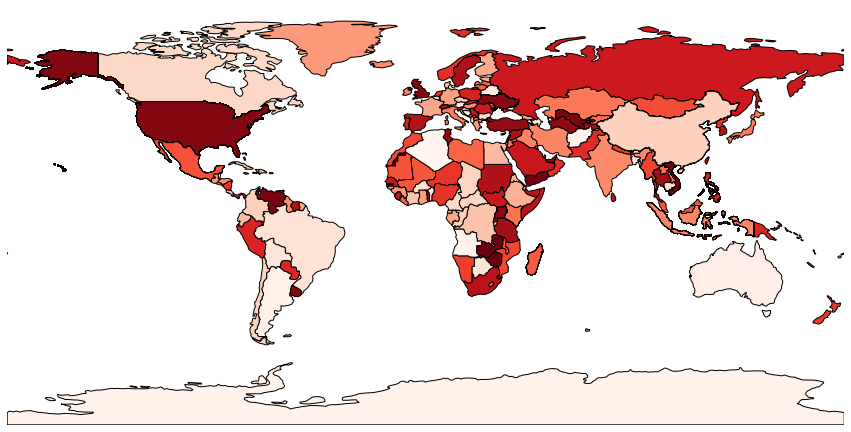

In [99]:

gp = geoplot.choropleth(
    world_clean, hue = world_clean['name'], scheme = None,
    cmap='Reds', figsize=(15, 15))

The greatest numbers of trafficking victims are citizens of the United States. Further investigation into whether this trafficking is happening at home or abroad or some combination would be next step analysis